In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [4]:
# create engine(connection) to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# View contents of the engine
inspector = inspect(engine) #connect to engine
inspector.get_table_names() # Collect the names of tables within the database


['measurement', 'station']

In [5]:
# Using inspector to print the column names within the 'measurements' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [6]:
# Using inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [7]:
# create a base class for an automap schema 
base = automap_base()

# reflect the tables onto base - generates orm classes
base.prepare(engine, reflect=True)

# View all of the classes that automap found- reads the orm classes
base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table - creates a variable for each table
measurement = base.classes.measurement
station = base.classes.station  


In [9]:
# link Python capacity to the DB using Session module
session = Session(engine)


# Exploratory Precipitation Analysis

In [10]:
# view tables
engine.table_names()


['measurement', 'station']

In [11]:
# Design a query to retrieve the last 12 months of precipitation data  
# Starting from the most recent (last) data point in the database and plot the results

# Find the most recent date  
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f"{recent_date}  :most recent/last date")

# Calculate the date one year from last date in data   
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(f"{year_ago} :one year from the last date in the data set.")

# Query to retrieve dates and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_ago).\
    order_by(measurement.date).all()
print(precipitation)


('2017-08-23',)  :most recent/last date
2016-08-23 :one year from the last date in the data set.
[('2016-08-23', 0.0), ('2016-08-23', 0.15), ('2016-08-23', 0.05), ('2016-08-23', None), ('2016-08-23', 0.02), ('2016-08-23', 1.79), ('2016-08-23', 0.7), ('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-

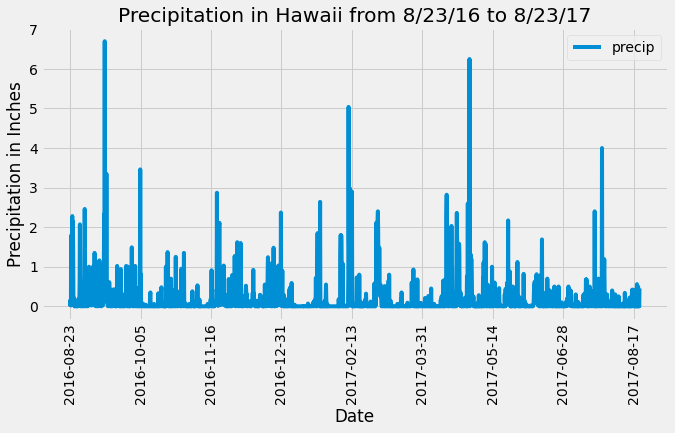

In [12]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation, columns=['date', 'precip'])

#drop NaN values
precipitation_df = precipitation_df.dropna()

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='date',ascending=True)

# Use Pandas Plotting with Matplotlib to plot thdata
precipitation_df.plot(x='date', y='precip', rot=90, figsize=(10,5))


# Set the chart title and axis labels
plt.title('Precipitation in Hawaii from 8/23/16 to 8/23/17')
plt.xlabel('Date')
plt.ylabel('Precipitation in Inches')

# Display the chart
plt.show()


In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()


,precip
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(station.id).count()
  
print(station_count)


9


In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)

# List the stations and the counts in descending order.
station_counts = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
print(station_counts)


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [16]:
# Using the most active station id 'USC00519281' from the previous query, calculate the lowest, highest, and average temperature.

# Lowest temperature recorded, highest temperature recorded, and average temperature most active station
most_active_station = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
print(most_active_station)


[(54.0, 85.0, 71.66378066378067)]


[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

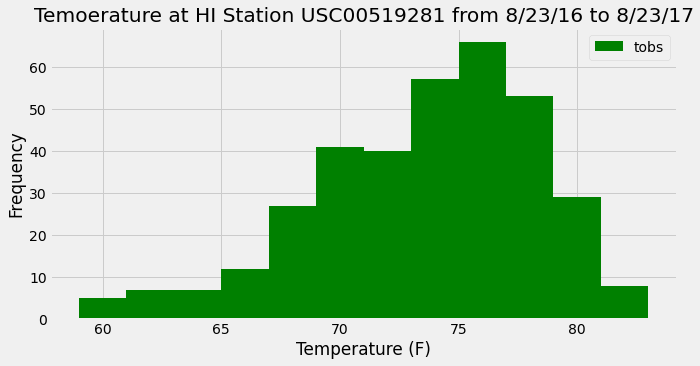

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram 

twelve_mos = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= year_ago).all()
print(twelve_mos)

#Create dataframe from query results
twelve_mos_df = pd.DataFrame(twelve_mos, columns=['tobs'])
twelve_mos_df.head()

# Create histogram
twelve_mos_df.plot.hist(bins=12, y='tobs', color='green', figsize=(10,5), by='date', legend=True)

# Set the chart title and axis labels
plt.title('Temoerature at HI Station USC00519281 from 8/23/16 to 8/23/17')
plt.xlabel('Temperature (F)')

#Display the chart
plt.show()


# Close Session

In [18]:
# Close Session
session.close()